# Introduction of the Dataset and Analysis Plan

### Structure of the dataset

We have a couple of options to choose from with datasets:
    - alldata.csv
    - 15 different states csv's
    
Ideally, we would like to see all of them in one because our plan is to answer these questions:

- How many job ads fit the Data Analyst skillset?
- Which are the top employers by number of job ads?
- What's the number of job ads which has salary information vs do not have salary information? 


We concluded 
- that we cannot define who was hired because we don't know the end result of the hiring process
- that we might miss some data because the same tasks, skills, positions are expressed differently


We will look at the datasets' statistics, datatypes, missing and duplicated values as well as visually assess it to define cleaning steps.


**Columns**

position: title of the position

company: name of the companies

description: job description

reviews: reviews of job ads

location: location of the job ads


## Assessment

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [264]:
# read csv
df = pd.read_csv('alldata.csv')

In [265]:
df_copy = df.copy()

In [266]:
# assess shape
df.shape

(6964, 5)

In [267]:
# assess first 20 rows 
df.head(20)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


In [268]:
# assess last 20 rows 
df.tail(20)

,position,company,description,reviews,location
6944,"Staff Data Scientist, Search/Online Grocery",Walmart eCommerce,Position Description\nIn this role you will\nA...,141.0,"Sunnyvale, CA"
6945,"Machine Learning Specialist, Trust and Safety",Google,Google's brand is only as strong as our users'...,2474.0,"Sunnyvale, CA"
6946,Research Scientist,Amazon.com,Job Description\nAlexa is the Amazon cloud ser...,25907.0,"Sunnyvale, CA"
6947,Applied Machine Learning Scientist,Amazon.com,Job Description\nExternal job description\nAma...,25907.0,"Sunnyvale, CA"
6948,Scientist,Microsoft,We are the Azure Big Data teams part of the C+...,4618.0,"Sunnyvale, CA"
6949,Systems software Performance Data Scientist Su...,Alibaba,We are the System Performance Team of Alibaba ...,15.0,"Sunnyvale, CA"
6950,Applied Scientist - Alexa Engine,Amazon.com,Job Description\nInterested in making the ‘Ale...,25907.0,"Sunnyvale, CA"
6951,Lead Data Scientist - NLP,TARGET,Description:\n\nAbout This Opportunity\nJoin t...,33275.0,"Sunnyvale, CA"
6952,Image processing Deep learning Research Scientist,Whiterabbit.ai,Whiterabbit.ai is a leading venture-backed sta...,NaN,"Sunnyvale, CA 94085"
6953,"Machine Learning Scientist, Amazon Alexa",Amazon.com,Job Description\nAmazon is looking for a passi...,25907.0,"Sunnyvale, CA"


In [269]:
# assess dtypes of columns
df.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [270]:
# assess statistics of the dataset
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [271]:
# assess column non-null values set to see which column has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [272]:
# assess percentage of null values
dfnulls = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)

In [273]:
dfnulls

,0
position,0.16
company,0.16
description,0.16
reviews,23.52
location,0.16


In [274]:
# assess df's null values
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [275]:
# assess df's duplicated values
sum(df.duplicated())

10

In [276]:
# assess frequency and list of values in different columns
df['position'].value_counts()

Data Scientist                                         351
Senior Data Scientist                                   96
Research Analyst                                        64
Data Engineer                                           60
Machine Learning Engineer                               56
                                                      ... 
Demand Forecaster                                        1
Env Health & Safety Spec I                               1
CCB - Risk-Fraud Data Scientist/Modeler-ML-Pipeline      1
Quantitative Analyst – Quality & Operations              1
Technology Solutions Professional- Data and AI           1
Name: position, Length: 5242, dtype: int64

In [277]:
# assess frequency and list of values in different columns
df['company'].value_counts()

Amazon.com            358
Ball Aerospace        187
Microsoft             137
Google                134
NYU Langone Health     77
                     ... 
VTS3                    1
Lonza Biologics         1
Marchex                 1
Streetline              1
Hopjump                 1
Name: company, Length: 2213, dtype: int64

In [278]:
# assess frequency and list of values in different columns
df['location'].value_counts()

Seattle, WA             563
New York, NY            508
Cambridge, MA           487
Boston, MA              454
San Francisco, CA       425
                       ... 
Washington, DC 20010      1
Austin, TX 78751          1
New York, NY 10055        1
Seattle, WA 98134         1
Washington, DC 20422      1
Name: location, Length: 382, dtype: int64

## Outcome of Assesment



### Cleaning steps

**Description column: Karina/Lilla**

- Scrape description column for Excel, R, Python, Tableau, Machine Learning, MySQL, SQL, A/B Tests, Data Mining, Data visualisation, (data visualization), Data Cleansing, Data Cleaning, Statistical modeling, Statistical Analysis

- create a column which validates if they are present in the description with a function and returns a True/False value in the column

- Scrape description column for levels: Entry-level, Junior/Associate,  Internship/Intern 

- create a column which validates if one is present in the description with a function and returns a True/False value in the column

- Before dropping the rows we don’t need, we check the position value

- Scrape for: dollars, $, salary 

- create a column which validates if one is present in the description with a function and returns a True/False value in the column

- Check if it's valid



**Position column: Karina/Lilla**

- Relocate seniority level to a different column

- Revisit when we have both new columns from description and position


**Review column: Neil**

- Drop it completely


**Location column: Neil**

- Check if there are typos
- Check how many zip codes are missing and make a decision to fill them in or not

In [279]:
# read the first few rows again
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [280]:
# drop review column
df = df.drop(['reviews'], axis=1)

In [281]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     6953 non-null   object
 1   company      6953 non-null   object
 2   description  6953 non-null   object
 3   location     6953 non-null   object
dtypes: object(4)
memory usage: 217.8+ KB


In [282]:
df.shape

(6964, 4)

In [283]:
# drop null values from other columns
df = df.dropna()

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     6953 non-null   object
 1   company      6953 non-null   object
 2   description  6953 non-null   object
 3   location     6953 non-null   object
dtypes: object(4)
memory usage: 271.6+ KB


In [285]:
df.shape

(6953, 4)

In [286]:
# change both columns to lowercase
df['position'] = df['position'].str.lower()

In [287]:
df['description'] = df['description'].str.lower()

In [288]:
#test 
df.head()

,position,company,description,location
0,development director,ALS TDI,development director\nals therapy development ...,"Atlanta, GA 30301"
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"job description\n\n""the road that leads to acc...","Atlanta, GA"
2,data scientist,Xpert Staffing,"growing company located in the atlanta, ga are...","Atlanta, GA"
3,data analyst,Operation HOPE,department: program operationsposition locatio...,"Atlanta, GA 30303"
4,assistant professor -tt - signal processing & ...,Emory University,description\nthe emory university department o...,"Atlanta, GA"


In [309]:
# define list of skills of a Data Analyst
lst_skills = ['Excel', 'R', 'Python', 'Tableau', 'Machine Learning', 'MySQL', 
              'SQL', 'A/B Tests', 'A/B Testing', 'Mining', 'Visualisation', 'Visualization',
              'Cleansing', 'Cleaning', 'Statistical modeling', 'Statistical Analysis']

# change uppercase letters to lowercase
for i in range(len(lst_skills)):
    lst_skills[i] = lst_skills[i].lower()
    
# create new column with boolean values
df['skills_description'] = df['description'].str.contains(" | ".join(lst_skills))

In [310]:
#test
df.head()

,position,company,description,location,skills_description,skills_position,has_salary
0,development director,ALS TDI,development director\nals therapy development ...,"Atlanta, GA 30301",False,False,True
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"job description\n\n""the road that leads to acc...","Atlanta, GA",True,False,False
2,data scientist,Xpert Staffing,"growing company located in the atlanta, ga are...","Atlanta, GA",True,False,True
3,data analyst,Operation HOPE,department: program operationsposition locatio...,"Atlanta, GA 30303",True,True,False
4,assistant professor -tt - signal processing & ...,Emory University,description\nthe emory university department o...,"Atlanta, GA",False,False,False


In [311]:
# do the same with the position column

# define list of  Data Analyst
lst_pos = ['Data Analyst']
df['skills_position'] = df['position'].str.contains(" | ".join(lst_pos))

# change uppercase letters to lowercase
for i in range(len(lst_pos)):
    lst_pos[i] = lst_pos[i].lower()

# create new column with boolean values    
df['skills_position'] = df['position'].str.contains(" | ".join(lst_pos))

In [295]:
df.head()

,position,company,description,location,skills_description,skills_position
0,development director,ALS TDI,development director\nals therapy development ...,"Atlanta, GA 30301",False,False
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"job description\n\n""the road that leads to acc...","Atlanta, GA",True,False
2,data scientist,Xpert Staffing,"growing company located in the atlanta, ga are...","Atlanta, GA",True,False
3,data analyst,Operation HOPE,department: program operationsposition locatio...,"Atlanta, GA 30303",True,True
4,assistant professor -tt - signal processing & ...,Emory University,description\nthe emory university department o...,"Atlanta, GA",False,False


In [303]:
# do the same to get is description has salary or not
# define list of salary keywords
lst_salary = ['Salary', 'salary']
df['has_salary'] = df['description'].str.contains(" | ".join(lst_salary))

In [304]:
#test
df.head()

,position,company,description,location,skills_description,skills_position,has_salary
0,development director,ALS TDI,development director\nals therapy development ...,"Atlanta, GA 30301",False,False,True
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"job description\n\n""the road that leads to acc...","Atlanta, GA",True,False,False
2,data scientist,Xpert Staffing,"growing company located in the atlanta, ga are...","Atlanta, GA",True,False,True
3,data analyst,Operation HOPE,department: program operationsposition locatio...,"Atlanta, GA 30303",True,True,False
4,assistant professor -tt - signal processing & ...,Emory University,description\nthe emory university department o...,"Atlanta, GA",False,False,False


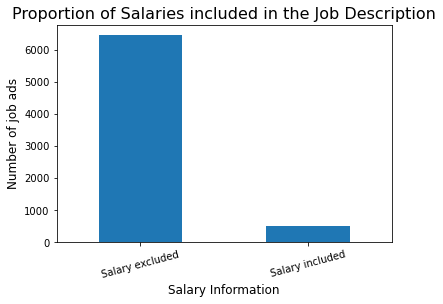

In [305]:
# plot outcome of new column
ax = df['has_salary'].value_counts().plot(kind="bar");
plt.xlabel('Salary Information', fontsize=12)
plt.ylabel('Number of job ads', fontsize=12)
plt.xticks(rotation=15)
plt.title('Proportion of Salaries included in the Job Description', fontsize=16)
ax.set_xticklabels(['Salary excluded', 'Salary included']);

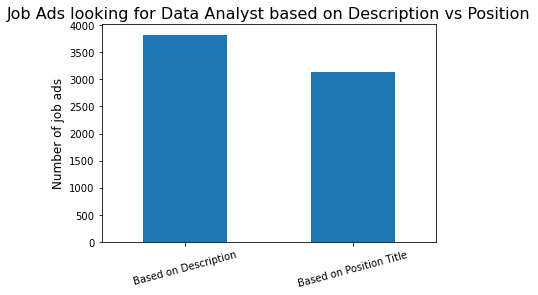

In [308]:
# plot the outcome of the two columns into one chartb
ax = df['skills_description'].value_counts().plot(kind="bar");
plt.ylabel('Number of job ads', fontsize=12)
plt.xticks(rotation=15)
plt.title('Job Ads looking for Data Analyst based on Description vs Position', fontsize=16)
ax.set_xticklabels(['Based on Description', 'Based on Position Title']);

In [ ]:
# count ocorrences of the top 10 locations with "Data Analyst"in position
df.groupby("location", sort=False)["position"].apply(
     lambda df: df.str.contains("Data Analyst").sum()
 ).nlargest(10)

In [ ]:
# count most frequent values of location column
df['location'].value_counts()

In [ ]:
# addign new variable to top locations
top_locations = df['location'].value_counts()
top_locations

In [ ]:
# define top 5 locations
top_locations[:5]

In [ ]:
# plot top 5 locations
top_locations[:5].plot(kind="bar");

In [ ]:
# count most frequent values of location column
# addign new variable to top locations

top_companies = df['company'].value_counts()
top_companies

In [ ]:
# plot top 5 locations
top_companies[:5].plot(kind="bar");

In [ ]:
# identidy rows for seniority level as 'Intern', 'Junior', 'Associated', 'Internship', 'Entry-level'
lst_level = ['Intern', 'Junior', 'Associated', 'Internship', 'Entry-level', 'Entry level']
df['description_level'] = df['description'].str.contains(" | ".join(lst_level))

In [ ]:
df.head()

In [ ]:
# filter by top locations for Data Analyst positions
df.groupby('location', sort=False)['position'].apply(
     lambda df: df.str.contains("Data Analyst").sum()
 ).nlargest(10)